In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib as plt

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models
from tensorflow.keras import metrics

In [4]:
data = pd.read_csv("synthetic_dataset_v2.5.csv")

In [5]:
data.head()

,wheel_omega,accel_x,tps,engine_rpm,steering_angle,yaw_rate,tire_temp,front_wheel_speed,TARGET_slip_ratio
0,183.751872,2.296843,0.847578,20155.448254,0.125665,3.345976,92.223662,39.890593,0.169143
1,165.713136,-2.024882,0.488263,17912.947968,0.197173,5.208059,86.588587,40.289864,0.032276
2,14.464610,-2.300191,0.000000,1529.303700,0.209690,4.356673,116.053289,31.187407,0.000000
3,164.748548,-2.472695,0.291187,18141.452295,0.163925,4.282546,96.424705,40.996823,0.026993
4,181.394517,2.719799,0.983611,19826.943903,0.016101,0.421060,90.561107,42.493937,0.087245


In [6]:
from sklearn.model_selection import train_test_split

In [8]:
X = data[["wheel_omega", "accel_x", "tps", "engine_rpm", "steering_angle", "yaw_rate", "tire_temp", "front_wheel_speed"]]
y = data[["TARGET_slip_ratio"]]

In [9]:
print(y)

        TARGET_slip_ratio
0                0.169143
1                0.032276
2                0.000000
3                0.026993
4                0.087245
...                   ...
799995           0.107837
799996           0.000000
799997           0.000000
799998           0.186055
799999           0.021685

[800000 rows x 1 columns]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [11]:
train_data = X_train.join(y_train)
train_data.head()

,wheel_omega,accel_x,tps,engine_rpm,steering_angle,yaw_rate,tire_temp,front_wheel_speed,TARGET_slip_ratio
632446,176.632120,2.710616,0.910626,19392.475788,-0.088249,-2.214425,97.258065,40.295878,0.108172
475089,190.474277,1.088211,0.849610,20675.172007,0.196512,5.708242,71.434402,42.440434,0.126671
357353,173.236974,1.571472,0.656719,19241.506705,0.101652,2.756311,72.020133,41.245392,0.081767
773087,208.162728,1.321157,1.000000,22724.558232,0.064810,1.908374,96.777970,46.416142,0.133513
74192,202.998764,1.634463,0.946398,22137.200803,-0.023043,-0.610687,100.619304,45.294056,0.132938


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_val_scaled = scaler.transform(X_val)
x_test_scaled = scaler.transform(X_test)

In [13]:
scaler.fit(X_train)

StandardScaler()

In [14]:
print("const int feature_count = ", len(scaler.mean_))

print("const float scaler_mean[] = {", end="")
print(*scaler.mean_, sep=', ', end="};\n")

print("const float scaler_scale[] = {", end="")
print(*scaler.scale_, sep=', ', end="};\n")

const int feature_count =  8
const float scaler_mean[] = {156.3544775880941, 0.07490010130679427, 0.5964262676358569, 17153.18485723369, 0.00081654285607554, 0.009752805156038827, 92.31719175593476, 39.093525991645635};
const float scaler_scale[] = {48.238292742893655, 2.1616977602700795, 0.2901259272441118, 5292.819255339074, 0.14165341481483415, 3.6794183101138596, 16.208271477842622, 4.344556959643097};


In [17]:
model = models.Sequential([
    layers.Dense(24, input_shape=(8,)),
    layers.BatchNormalization(),
    layers.Activation('sigmoid'),
    layers.Dense(12),
    layers.BatchNormalization(),
    layers.Activation('sigmoid'),
    layers.Dense(1, activation='linear')
])

model.compile(
    optimizer='adam',
    loss='mae',
    metrics=[metrics.MeanAbsoluteError()]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
history = model.fit(x_train_scaled, y_train, validation_data = (x_val_scaled, y_val), epochs=30, batch_size=256)

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0100 - mean_absolute_error: 0.0100 - val_loss: 0.0172 - val_mean_absolute_error: 0.0172
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0081 - mean_absolute_error: 0.0081 - val_loss: 0.0048 - val_mean_absolute_error: 0.0048
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - val_loss: 0.0055 - val_mean_absolute_error: 0.0055
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 - val_loss: 0.0100 - val_mean_absolute_error: 0.0100
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - val_loss: 0.0064 - val_mean_absolute_error: 0.0064
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0070 - mean_absolute_err

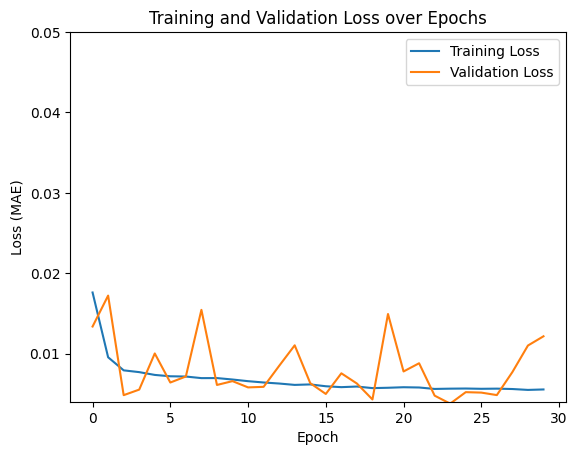

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.ylim(0.004, 0.05)
plt.show()

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 24)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 12)             │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,877 (7.34 KB)

 Trainable params: 601 (2.35 KB)

 Non-trainable params: 72 (288.00 B)

 Optimizer params: 1,204 (4.71 KB)

In [21]:
model.evaluate(x_test_scaled, y_test)

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - loss: 0.0122 - mean_absolute_error: 0.0122


[0.012179600074887276, 0.012179600074887276]

In [22]:
preds = (model.predict(x_test_scaled))

5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


In [24]:
results_df = pd.DataFrame({'Actual Slip Ratio': y_test['TARGET_slip_ratio'], 'Predicted Slip Ratio': preds.flatten()})
display(results_df)

,Actual Slip Ratio,Predicted Slip Ratio
670935,0.137004,0.130025
649589,0.000000,-0.000855
2028,0.049963,0.038783
669856,0.070569,0.057652
458897,0.040313,0.041028
...,...,...
545479,0.000000,-0.000343
252301,0.186181,0.164505
706417,0.000000,-0.000409
518155,0.064969,0.055431


In [29]:
from sklearn.metrics import mean_absolute_error

# permutation test - ensures one feature isn'd dominating
def permutation_test(model, X, y, feature_names=None):
    baseline = model.predict(X, verbose=0).flatten()
    baseline_mae = mean_absolute_error(y, baseline)

    print(f"Baseline MAE: {baseline_mae:.6f}\n")

    for i in range(X.shape[1]):
        X_permuted = X.copy()
        np.random.shuffle(X_permuted[:, i])

        preds = model.predict(X_permuted, verbose=0).flatten()
        mae = mean_absolute_error(y, preds)

        delta = mae - baseline_mae
        name = feature_names[i] if feature_names else f"Feature {i}"
        print(f"{name:20s} | MAE: {mae:.6f} | Δ: {delta:.6f}")


In [30]:
permutation_test(model, x_test_scaled, y_test, ["wheel_omega", "accel_x", "tps", "engine_rpm", "steering_angle", "yaw_rate", "tire_temp", "front_wheel_speed"])

Baseline MAE: 0.012180

wheel_omega          | MAE: 0.036720 | Δ: 0.024540
accel_x              | MAE: 0.027729 | Δ: 0.015550
tps                  | MAE: 0.012325 | Δ: 0.000146
engine_rpm           | MAE: 0.074365 | Δ: 0.062185
steering_angle       | MAE: 0.012141 | Δ: -0.000038
yaw_rate             | MAE: 0.012205 | Δ: 0.000026
tire_temp            | MAE: 0.011978 | Δ: -0.000202
front_wheel_speed    | MAE: 0.074297 | Δ: 0.062117


In [ ]:
model.save('slip_model.h5')
print("Model saved to slip_ratio_toy_model.h5")

Model saved to slip_ratio_toy_model.h5


In [ ]:
model.save('slip_model.keras')
print("Model saved to slip_ratio_toy_model.keras")

Model saved to slip_ratio_toy_model.keras


In [ ]:
import numpy as np
np.savez("scaler_values.npz", mean=scaler.mean_, scale=scaler.scale_)